<a href="https://colab.research.google.com/github/sandovalmedeiros/PythonGeo/blob/main/Modulo_08_TI_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 08 - Estruturas de Dados

## GeoSeries vs GeoDataframe

A `GeoSeries` é um vetor onde cada entrada no vetor é um conjunto de formas correspondentes a uma observação, por exemplo, um único polígono.

Já o `GeoDataframe` é uma estrutura de dados que contém um arquivo `GeoSeries`.

In [29]:
!pip install click==8.1.3
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from shapely.geometry import Polygon, LineString, Point

s = gpd.GeoSeries(
    [
        Polygon([(0, 0), (1,1), (0,1)]),
        Polygon([(10, 0), (10,5), (0,0)]),
        Polygon([(0, 0), (2,2), (2,0)]),
        LineString([(0, 0), (1,1), (0,1)]),
        Point(0,1)
    ]

)
s

0    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0....
1    POLYGON ((10.00000 0.00000, 10.00000 5.00000, ...
2    POLYGON ((0.00000 0.00000, 2.00000 2.00000, 2....
3    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
4                              POINT (0.00000 1.00000)
dtype: geometry

In [ ]:
type(s)

geopandas.geoseries.GeoSeries

## Diferença entre Dataframe e GeoDataframe



In [ ]:
import geopandas as gpd
import os
from osgeo import gdal
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
in_vector = '/content/Reg_BA/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp'
gdf = gpd.read_file(in_vector)

In [12]:
# Definir o caminho da pasta
#pasta = r'C:\AmbientalPro\Extras\BR_Municipios_2021\BR_Municipios_2021.shp'
pasta = "/content/Reg_BA/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp"

# Juntar o nome do arquivo com a pasta
#pasta_arquivo = os.path.join(pasta, 'BR_Municipios_2021.shp')
print(pasta)
#print(pasta_arquivo)

/content/Reg_BA/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp


In [ ]:
dados = gpd.read_file(pasta)

In [32]:
type(dados)

geopandas.geodataframe.GeoDataFrame

In [ ]:
dados.head(10)

In [24]:
dados.tail()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,geometry
412,2927101,Rodelas,2902,Vale Sanfranciscano da Bahia,24,Itaparica,None
413,2907707,Chorrochó,2902,Vale Sanfranciscano da Bahia,24,Itaparica,None
414,2907202,Casa Nova,2902,Vale Sanfranciscano da Bahia,10,Sertão do São Francisco,None
415,2900207,Abaré,2902,Vale Sanfranciscano da Bahia,24,Itaparica,None
416,2909901,Curaçá,2902,Vale Sanfranciscano da Bahia,10,Sertão do São Francisco,None


In [34]:
# Verificar o nome das colunas
dados.columns.values

array(['codmun', 'nommun', 'codregmeso', 'nomregmeso', 'codregmicr',
       'nomregmicr', 'codreginte', 'nomreginte', 'codregimed',
       'nomregimed', 'indregpoli', 'indregsemi', 'codti', 'nomti',
       'codregecon', 'nomregecon', 'cod_regadm', 'nomregadm',
       'codeixodes', 'nomeixodes', 'codnte', 'nomnte', 'codnrs', 'nomnrs',
       'codregsau', 'nomregsau', 'codzonatur', 'nomzonatur', 'st_area_sh',
       'st_length_', 'geometry'], dtype=object)

In [35]:
dados = dados[['codmun','nommun','codregmeso', 'nomregmeso', 'codti', 'nomti', 'st_area_sh', 'st_length_', 'geometry']]
dados.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,0.112292,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7..."
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,0.148912,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7..."
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,0.065687,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6..."
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,0.202838,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4..."
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,0.053214,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3..."


In [36]:
dados.shape

(417, 9)

In [37]:
# Verificando o número de linhas e colunas
print(f'O número de linhas é: {dados.shape[0]}')
print(f'O número de colunas é: {dados.shape[1]}')

O número de linhas é: 417
O número de colunas é: 9


<AxesSubplot:>

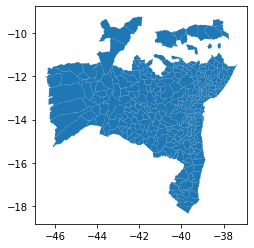

In [38]:
dados.plot()

In [39]:
for indice, linha in dados[0:10].iterrows():
    area_polig = linha['geometry'].area
    print(f"O polígono de índice {indice} possui uma área de {area_polig:.2f} m²")
    

O polígono de índice 0 possui uma área de 0.11 m²
O polígono de índice 1 possui uma área de 0.15 m²
O polígono de índice 2 possui uma área de 0.07 m²
O polígono de índice 3 possui uma área de 0.20 m²
O polígono de índice 4 possui uma área de 0.05 m²
O polígono de índice 5 possui uma área de 0.13 m²
O polígono de índice 6 possui uma área de 0.14 m²
O polígono de índice 7 possui uma área de 0.12 m²
O polígono de índice 8 possui uma área de 0.20 m²
O polígono de índice 9 possui uma área de 0.12 m²


In [43]:
# Criar uma coluna área em km2
dados['area_km2'] = dados.area
dados.head()

<ipython-input-43-93163f93e072>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dados['area_km2'] = dados.area


,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,0.112292,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,0.148912,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,0.065687,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,0.202838,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,0.053214,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214


In [41]:
# Apagando a coluna area por estar fora do padrão de nome de atributo
dados = dados.drop(columns=['Area'])
dados.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,0.112292,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7..."
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,0.148912,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7..."
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,0.065687,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6..."
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,0.202838,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4..."
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,0.053214,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3..."


In [44]:
dados['st_area_sh'] = dados['area_km2'] * 100
dados.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,11.229212,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,14.891190,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,6.568659,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,20.283775,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,5.321426,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214


In [45]:
# área máxima em km2
round(dados['area_km2'].max(), 2)

1.26

In [46]:
# área mínima em km2
dados['area_km2'].min()

0.002749316655600316

In [47]:
# área média em km2
dados['area_km2'].mean()

0.0983060549205657

In [48]:
# Soma de todas as área em km2 
dados['area_km2'].sum() / dados['area_km2'].shape[0]

0.08628301223243896

# Selecionando um Município e Salvando

In [49]:
select = dados.loc[dados['nommun'] == 'Valença']

In [50]:
select.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
185,2932903,Valença,2907,Sul Baiano,6,Baixo Sul,9.397043,2.587195,"POLYGON ((-39.33611 -13.19906, -39.33564 -13.1...",0.09397


<AxesSubplot:>

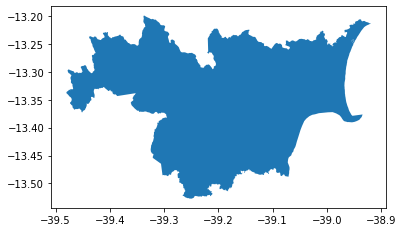

In [51]:
select.plot()

In [52]:
pasta_saida = r"/content/Reg_BA/Municipios"

# Criar pasta
os.mkdir(pasta_saida)

In [53]:
arquivo_saida = os.path.join(pasta_saida, "BA_Valenca.shp")
print(arquivo_saida)

/content/Reg_BA/Municipios/BA_Valenca.shp


In [54]:
# Salvando o arquivo
select.to_file(arquivo_saida)

# Agrupando GeoDataframe

In [55]:
dados.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,11.229212,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,14.891190,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,6.568659,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,20.283775,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,5.321426,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214


In [56]:
# DPA da Bahia com informações de TI e agrupar os municípios por TI
dados['nomti'].unique()

array(['Extremo Sul', 'Costa do Descobrimento', 'Médio Sudoeste da Bahia',
       'Litoral Sul', 'Sudoeste Baiano', 'Baixo Sul', 'Sertão Produtivo',
       'Médio Rio de Contas', 'Bacia do Rio Corrente', 'Velho Chico',
       'Vale do Jiquiriçá', 'Chapada Diamantina',
       'Piemonte Norte do Itapicuru', 'Semiárido Nordeste II',
       'Sertão do São Francisco', 'Bacia do Paramirim', 'Itaparica',
       'Recôncavo', 'Metropolitano de Salvador', 'Piemonte do Paraguaçu',
       'Litoral Norte e Agreste Baiano', 'Portal do Sertão',
       'Bacia do Rio Grande', 'Bacia do Jacuípe', 'Sisal', 'Irecê',
       'Piemonte da Diamantina'], dtype=object)

In [59]:
agrupar = dados.groupby('nomti')
agrupar

In [60]:
agrupar.groups.keys()

dict_keys(['Bacia do Jacuípe', 'Bacia do Paramirim', 'Bacia do Rio Corrente', 'Bacia do Rio Grande', 'Baixo Sul', 'Chapada Diamantina', 'Costa do Descobrimento', 'Extremo Sul', 'Irecê', 'Itaparica', 'Litoral Norte e Agreste Baiano', 'Litoral Sul', 'Metropolitano de Salvador', 'Médio Rio de Contas', 'Médio Sudoeste da Bahia', 'Piemonte Norte do Itapicuru', 'Piemonte da Diamantina', 'Piemonte do Paraguaçu', 'Portal do Sertão', 'Recôncavo', 'Semiárido Nordeste II', 'Sertão Produtivo', 'Sertão do São Francisco', 'Sisal', 'Sudoeste Baiano', 'Vale do Jiquiriçá', 'Velho Chico'])

In [61]:
for chave, grupo in agrupar:
    print(f'Nome do Território Identidade: {chave}')
    print(f'Número de Municípios: {len(grupo)}')

Nome do Território Identidade: Bacia do Jacuípe
Número de Municípios: 15
Nome do Território Identidade: Bacia do Paramirim
Número de Municípios: 8
Nome do Território Identidade: Bacia do Rio Corrente
Número de Municípios: 11
Nome do Território Identidade: Bacia do Rio Grande
Número de Municípios: 14
Nome do Território Identidade: Baixo Sul
Número de Municípios: 15
Nome do Território Identidade: Chapada Diamantina
Número de Municípios: 24
Nome do Território Identidade: Costa do Descobrimento
Número de Municípios: 8
Nome do Território Identidade: Extremo Sul
Número de Municípios: 13
Nome do Território Identidade: Irecê
Número de Municípios: 20
Nome do Território Identidade: Itaparica
Número de Municípios: 6
Nome do Território Identidade: Litoral Norte e Agreste Baiano
Número de Municípios: 20
Nome do Território Identidade: Litoral Sul
Número de Municípios: 26
Nome do Território Identidade: Metropolitano de Salvador
Número de Municípios: 13
Nome do Território Identidade: Médio Rio de Cont

In [62]:
arquivo_saida = r"/content/Reg_BA/Municipios"

resultado = os.path.join(arquivo_saida, "Resultados")

if not os.path.exists(resultado):
    print("Criando a pasta.")
    os.makedirs(resultado)
else:
    print("A pasta ja existe")

Criando a pasta.


In [65]:
agrupar.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,geometry,area_km2
0,2923001,Nova Viçosa,2907,Sul Baiano,7,Extremo Sul,11.229212,2.078712,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,2922003,Mucuri,2907,Sul Baiano,7,Extremo Sul,14.891190,2.493083,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,2912806,Ibirapoã,2907,Sul Baiano,7,Extremo Sul,6.568659,1.415191,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,2906907,Caravelas,2907,Sul Baiano,7,Extremo Sul,20.283775,3.028362,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,2918902,Lajedão,2907,Sul Baiano,7,Extremo Sul,5.321426,1.456028,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214
...,...,...,...,...,...,...,...,...,...,...
406,2930774,Sobradinho,2902,Vale Sanfranciscano da Bahia,10,Sertão do São Francisco,NaN,1.838491,None,NaN
410,2911402,Glória,2902,Vale Sanfranciscano da Bahia,24,Itaparica,NaN,2.052888,None,NaN
411,2919900,Macururé,2902,Vale Sanfranciscano da Bahia,24,Itaparica,NaN,2.543698,None,NaN
412,2927101,Rodelas,2902,Vale Sanfranciscano da Bahia,24,Itaparica,NaN,3.260990,None,NaN


In [67]:
for chave, grupo in agrupar:
    nome_saida = f'{chave}.shp'
    print('Salvando o arquivo', os.path.basename(nome_saida))
    caminho_saida = os.path.join(resultado, nome_saida)
    grupo.to_file(caminho_saida)

Salvando o arquivo Bacia do Jacuípe.shp
Salvando o arquivo Bacia do Paramirim.shp
Salvando o arquivo Bacia do Rio Corrente.shp
Salvando o arquivo Bacia do Rio Grande.shp
Salvando o arquivo Baixo Sul.shp
Salvando o arquivo Chapada Diamantina.shp
Salvando o arquivo Costa do Descobrimento.shp
Salvando o arquivo Extremo Sul.shp
Salvando o arquivo Irecê.shp
Salvando o arquivo Itaparica.shp
Salvando o arquivo Litoral Norte e Agreste Baiano.shp
Salvando o arquivo Litoral Sul.shp
Salvando o arquivo Metropolitano de Salvador.shp
Salvando o arquivo Médio Rio de Contas.shp
Salvando o arquivo Médio Sudoeste da Bahia.shp
Salvando o arquivo Piemonte Norte do Itapicuru.shp
Salvando o arquivo Piemonte da Diamantina.shp
Salvando o arquivo Piemonte do Paraguaçu.shp
Salvando o arquivo Portal do Sertão.shp
Salvando o arquivo Recôncavo.shp
Salvando o arquivo Semiárido Nordeste II.shp
Salvando o arquivo Sertão Produtivo.shp
Salvando o arquivo Sertão do São Francisco.shp
Salvando o arquivo Sisal.shp
Salvando

# Trabalhando com Coordenadas

Para saber o código do EPSG da região de interesse existem diversos sites, mas eu costumo utilizar esse aqui: 
https://spatialreference.org/

In [ ]:
import geopandas as gpd

In [68]:
arquivo = r"/content/Reg_BA/Municipios/Resultados/Bacia do Jacuípe.shp"

In [70]:
dados_bacia_jacuipe = gpd.read_file(arquivo)
dados_bacia_jacuipe.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,area_km2,geometry
0,2930402,Serra Preta,2903,Centro Norte Baiano,15,Bacia do Jacuípe,4.943099,1.130570,0.049431,"POLYGON ((-39.34044 -11.96596, -39.34011 -11.9..."
1,2914000,Ipirá,2903,Centro Norte Baiano,15,Bacia do Jacuípe,25.796304,2.592917,0.257963,"POLYGON ((-39.77998 -11.89869, -39.77909 -11.8..."
2,2902609,Baixa Grande,2903,Centro Norte Baiano,15,Bacia do Jacuípe,8.030085,1.513980,0.080301,"POLYGON ((-40.19306 -11.82801, -40.19308 -11.8..."
3,2924058,Pé de Serra,2904,Nordeste Baiano,15,Bacia do Jacuípe,4.951439,1.092995,0.049514,"POLYGON ((-39.54146 -11.75822, -39.54087 -11.7..."
4,2924652,Pintadas,2903,Centro Norte Baiano,15,Bacia do Jacuípe,5.369395,1.202601,0.053694,"POLYGON ((-39.88515 -11.74014, -39.88512 -11.7..."


In [71]:
# Verificar o sistema de coordenadas
dados_bacia_jacuipe.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [72]:
# Criar uma cópia do arquivo
dados_bacia_jacuipe_epsg_4674 = dados_bacia_jacuipe.copy()

# Reprojetar para a coordenada da região
dados_bacia_jacuipe = dados_bacia_jacuipe.to_crs(epsg=31982)

In [73]:
dados_bacia_jacuipe.crs

<Derived Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 54°W and 48°W, northern and southern hemispheres, onshore and offshore. In remainder of South America - between 54°W and 48°W, southern hemisphere, onshore and offshore.
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [74]:
dados_bacia_jacuipe.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,area_km2,geometry
0,2930402,Serra Preta,2903,Centro Norte Baiano,15,Bacia do Jacuípe,4.943099,1.130570,0.049431,"POLYGON ((1777541.426 8649980.443, 1777577.866..."
1,2914000,Ipirá,2903,Centro Norte Baiano,15,Bacia do Jacuípe,25.796304,2.592917,0.257963,"POLYGON ((1729108.392 8659598.529, 1729203.122..."
2,2902609,Baixa Grande,2903,Centro Norte Baiano,15,Bacia do Jacuípe,8.030085,1.513980,0.080301,"POLYGON ((1683659.850 8669379.894, 1683656.860..."
3,2924058,Pé de Serra,2904,Nordeste Baiano,15,Bacia do Jacuípe,4.951439,1.092995,0.049514,"POLYGON ((1756215.884 8674327.266, 1756248.989..."
4,2924652,Pintadas,2903,Centro Norte Baiano,15,Bacia do Jacuípe,5.369395,1.202601,0.053694,"POLYGON ((1718170.485 8677912.580, 1718173.505..."


In [78]:
dados_bacia_jacuipe['area_km2'] = dados_bacia_jacuipe.area
dados_bacia_jacuipe.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,area_km2,geometry
0,2930402,Serra Preta,2903,Centro Norte Baiano,15,Bacia do Jacuípe,4.943099,1.130570,6.190924e+08,"POLYGON ((1777541.426 8649980.443, 1777577.866..."
1,2914000,Ipirá,2903,Centro Norte Baiano,15,Bacia do Jacuípe,25.796304,2.592917,3.220002e+09,"POLYGON ((1729108.392 8659598.529, 1729203.122..."
2,2902609,Baixa Grande,2903,Centro Norte Baiano,15,Bacia do Jacuípe,8.030085,1.513980,1.000879e+09,"POLYGON ((1683659.850 8669379.894, 1683656.860..."
3,2924058,Pé de Serra,2904,Nordeste Baiano,15,Bacia do Jacuípe,4.951439,1.092995,6.195858e+08,"POLYGON ((1756215.884 8674327.266, 1756248.989..."
4,2924652,Pintadas,2903,Centro Norte Baiano,15,Bacia do Jacuípe,5.369395,1.202601,6.706086e+08,"POLYGON ((1718170.485 8677912.580, 1718173.505..."


In [80]:
dados_bacia_jacuipe_epsg_4674.head()

,codmun,nommun,codregmeso,nomregmeso,codti,nomti,st_area_sh,st_length_,area_km2,geometry
0,2930402,Serra Preta,2903,Centro Norte Baiano,15,Bacia do Jacuípe,4.943099,1.130570,0.049431,"POLYGON ((-39.34044 -11.96596, -39.34011 -11.9..."
1,2914000,Ipirá,2903,Centro Norte Baiano,15,Bacia do Jacuípe,25.796304,2.592917,0.257963,"POLYGON ((-39.77998 -11.89869, -39.77909 -11.8..."
2,2902609,Baixa Grande,2903,Centro Norte Baiano,15,Bacia do Jacuípe,8.030085,1.513980,0.080301,"POLYGON ((-40.19306 -11.82801, -40.19308 -11.8..."
3,2924058,Pé de Serra,2904,Nordeste Baiano,15,Bacia do Jacuípe,4.951439,1.092995,0.049514,"POLYGON ((-39.54146 -11.75822, -39.54087 -11.7..."
4,2924652,Pintadas,2903,Centro Norte Baiano,15,Bacia do Jacuípe,5.369395,1.202601,0.053694,"POLYGON ((-39.88515 -11.74014, -39.88512 -11.7..."


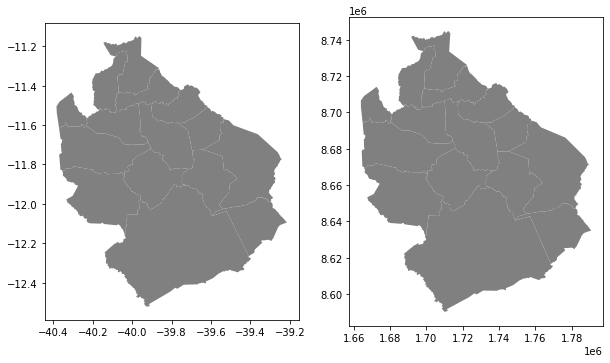

In [82]:
import matplotlib.pyplot as plt

# Fazendo um plot do lado do outro

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

dados_bacia_jacuipe_epsg_4674.plot(ax=ax1, facecolor='gray')
dados_bacia_jacuipe.plot(ax=ax2, facecolor='gray')

# Definir a proporção como 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)


In [84]:
# Salvar o arquivo

arquivo_saida = r"/content/Reg_BA/Municipios/Resultados/Bacia_Jacuipe_epsg31982.shp'

SyntaxError: ignored